# Overview

I. Classification
- Nearest Neighbor Classifiers
- Decision Trees
- Naive Bayes Classifier

II. Combining Classifiers
- Bagging
- Boosting
- Random Forest

III. Evaluating Classifiers

IV. Scoring Models

V. Classification as Optimization

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Decision Trees

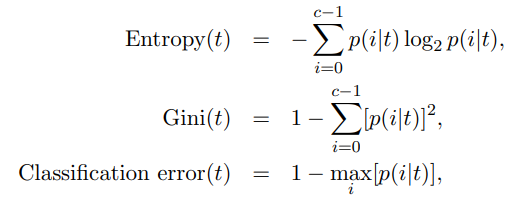
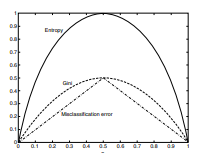

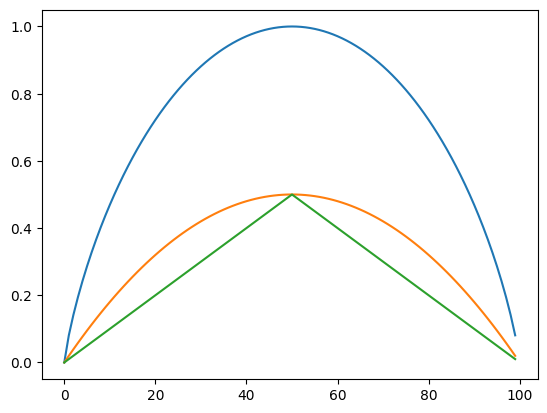

In [12]:
def normalize(nums):
    return nums / np.sum(nums)


def my_log2(x):
    if x == 0:
        return 0
    else:
        return np.log2(x)


def entropy(nums):
    p = normalize(nums)
    x = 0
    for i in p:
        x += i * my_log2(i)
    return -x


def gini(nums):
    p = normalize(nums)
    return 1 - np.sum(p ** 2)


def classification_error(nums):
    p = normalize(nums)
    return 1 - np.max(p)


def plot(algo, algo_name):
    x = range(100)
    y = []
    for i in x:
        nums = np.array([i, 100 - i])
        y.append(algo(nums))
    ax.plot(x, y, label=algo_name)


fig, ax = plt.subplots()
plot(entropy, 'entropy')
plot(gini, 'gini')
plot(classification_error, 'classification_error')
plt.show()


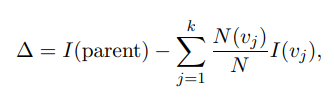
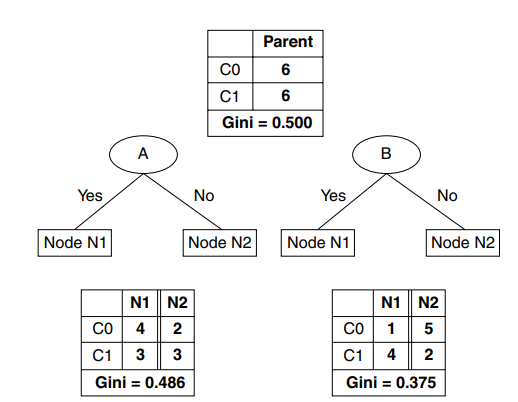

In [31]:
def normalize(nums):
    return nums / np.sum(nums)

def gini(nums):
    p = normalize(nums)
    return 1 - np.sum(p ** 2)

def impurity_children(data, parent, children, impurity):
    x = 0
    for child in children:
        imp = impurity(data[child])
        # Add weight
        imp *= np.sum(data[child]) / np.sum(data[parent])
        x += imp
    return x

def gain(data, parent, children, impurity):
    imp = impurity_children(data, parent, children, impurity)
    return impurity(data[parent]) - imp

def plot(data):
    imp = impurity_children(data, parent=0, children=[1, 2], impurity=gini)
    g = gain(data, parent=0, children=[1, 2], impurity=gini)
    print(f'{imp:.3f} => gain: {g:.3f}')

data1 = {}
data1[0] = np.array([6, 6])  # Parent
data1[1] = np.array([4, 3])  # Child 1
data1[2] = np.array([2, 3])  # Child 2

data2 = {}
data2[0] = np.array([6, 6])  # Parent
data2[1] = np.array([1, 4])  # Child 1
data2[2] = np.array([5, 2])  # Child 2

plot(data1)
plot(data2)

0.486 => gain: 0.014
0.371 => gain: 0.129


## Problem
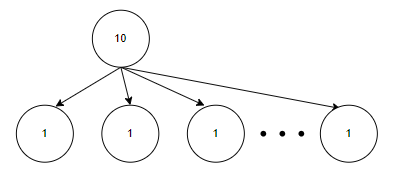

### Bad Split